# Análisis de Datos del Dataset de OLX Cars

Este notebook realiza un análisis exploratorio y modelado predictivo del dataset de autos usados listados en OLX. El objetivo es entender las características de los autos y predecir sus precios de forma efectiva.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Carga de Datos

A continuación, cargamos el dataset y mostramos las primeras filas para tener una idea preliminar de la estructura de los datos.


In [29]:
# Cargando el dataset
data_path = '../Documentos/OLX_cars_dataset00.csv'
data = pd.read_csv(data_path)
data.head()

# Mostrar los nombres de las columnas
print(data.columns)


Index(['Ad ID', 'Car Name', 'Make', 'Model', 'Year', 'KM's driven', 'Price',
       'Fuel', 'Registration city', 'Car documents', 'Assembly',
       'Transmission', 'Condition', 'Seller Location', 'Description',
       'Car Features', 'Images URL's', 'Car Profile'],
      dtype='object')


## Información General del Dataset

Vamos a revisar los tipos de datos y buscar columnas con valores faltantes.


In [21]:
# Información general del dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ad ID              9179 non-null   int64 
 1   Car Name           9179 non-null   object
 2   Make               9179 non-null   object
 3   Model              9179 non-null   object
 4   Year               9179 non-null   int64 
 5   KM's driven        9179 non-null   int64 
 6   Price              9179 non-null   int64 
 7   Fuel               9179 non-null   object
 8   Registration city  9179 non-null   object
 9   Car documents      9179 non-null   object
 10  Assembly           9179 non-null   object
 11  Transmission       9179 non-null   object
 12  Condition          9179 non-null   object
 13  Seller Location    9179 non-null   object
 14  Description        9179 non-null   object
 15  Car Features       9179 non-null   object
 16  Images URL's       9179 non-null   object


## Limpieza de Datos

El proceso de limpieza incluye la eliminación de duplicados, el manejo de valores faltantes y la corrección de tipos de datos erróneos.


In [22]:
# Eliminación de duplicados
data.drop_duplicates(inplace=True)

# Identificar columnas numericas
numeric_cols = data.select_dtypes(include=np.number).columns

# Llenar valores faltantes solo en columnas numericas
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Conversión de tipos de datos erróneos
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8978 entries, 0 to 9178
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ad ID              8978 non-null   int64 
 1   Car Name           8978 non-null   object
 2   Make               8978 non-null   object
 3   Model              8978 non-null   object
 4   Year               8978 non-null   int64 
 5   KM's driven        8978 non-null   int64 
 6   Price              8978 non-null   int64 
 7   Fuel               8978 non-null   object
 8   Registration city  8978 non-null   object
 9   Car documents      8978 non-null   object
 10  Assembly           8978 non-null   object
 11  Transmission       8978 non-null   object
 12  Condition          8978 non-null   object
 13  Seller Location    8978 non-null   object
 14  Description        8978 non-null   object
 15  Car Features       8978 non-null   object
 16  Images URL's       8978 non-null   object
 17  

## Análisis Exploratorio de Datos (EDA)

Realizamos algunas visualizaciones para entender la distribución de los precios y la relación entre el año del coche y su precio.


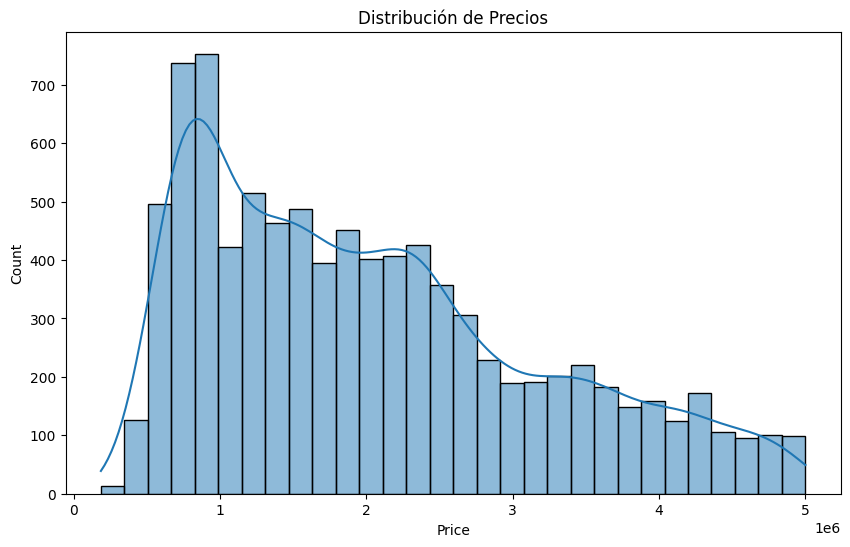

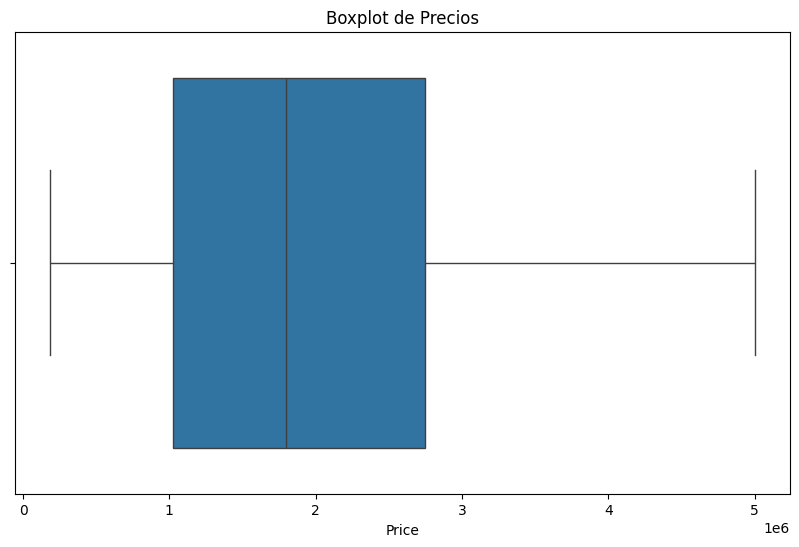

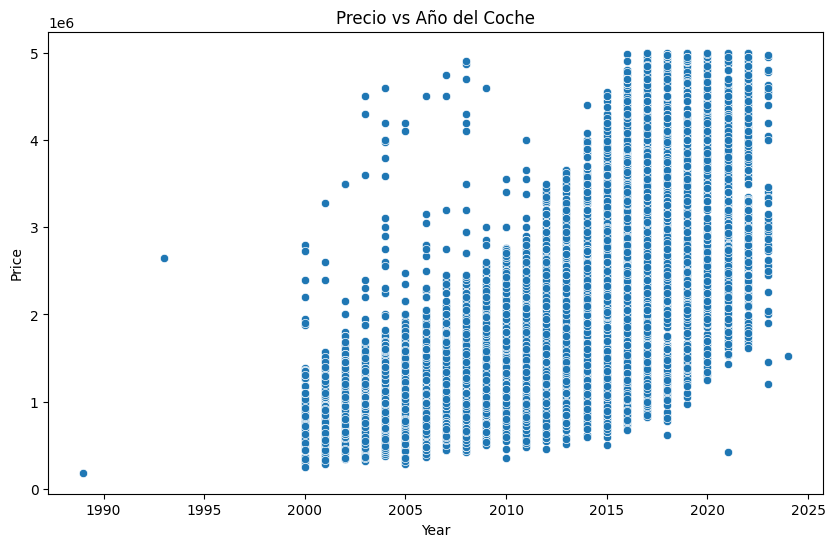

In [23]:
# Visualización de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribución de Precios')
plt.show()

# Boxplot de precios para detectar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.title('Boxplot de Precios')
plt.show()

# Relación entre el año del coche y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=data)
plt.title('Precio vs Año del Coche')
plt.show()


## Modelado Predictivo

Preparamos los datos para el modelo, entrenamos un modelo de regresión lineal y evaluamos su rendimiento.


In [24]:

X = data[['Year', "KM's driven"]]
y = data['Price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones y evaluacion del modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"El MSE del modelo es: {mse}")


El MSE del modelo es: 672772190211.8619


# Conclusiones

Este análisis proporciona una visión preliminar de los factores que pueden influir en los precios de los autos usados en OLX. El modelo de regresión lineal ofrece una base para futuras mejoras y ajustes más detallados.
